In [17]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

Data Loading and Visualization 


In [18]:
# Read salary data
file_path = Path("Resources/cleaned_data.csv")
df_heart_health = pd.read_csv(file_path)

# Display sample data
df_heart_health.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,CHDRisk,MAP
0,1.0,39,4,0.0,0,0,0,0,0,195,26.97,80,77,0,82.000000
1,0.0,46,2,0.0,0,0,0,0,0,250,28.73,95,76,0,94.333333
2,1.0,48,1,1.0,20,0,0,0,0,245,25.34,75,70,0,95.833333
3,0.0,61,3,1.0,30,0,0,1,0,225,28.58,65,103,1,113.333333
4,0.0,46,3,1.0,23,0,0,0,0,285,23.10,85,85,0,99.333333


Generate Some Training / Testing Data



In [19]:
# Define features (X) and target (y)
X = df_heart_health.drop(columns=['CHDRisk'])
y = df_heart_health['CHDRisk']

In [29]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(df_heart_health.drop('CHDRisk', axis=1), df_heart_health['CHDRisk'])
y_resampled.value_counts()
y = y_resampled
X = X_resampled

In [33]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [34]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [36]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [37]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[431 195]
 [187 421]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.69       626
           1       0.68      0.69      0.69       608

    accuracy                           0.69      1234
   macro avg       0.69      0.69      0.69      1234
weighted avg       0.69      0.69      0.69      1234


Accuracy Score:
0.6904376012965965


/var/folders/bq/ygl1sq6n0dn8rk2pz214pfj00000gn/T/ipykernel_54901/2392301787.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + ['No CHD', 'CHD'])
/var/folders/bq/ygl1sq6n0dn8rk2pz214pfj00000gn/T/ipykernel_54901/2392301787.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + ['No CHD', 'CHD'])


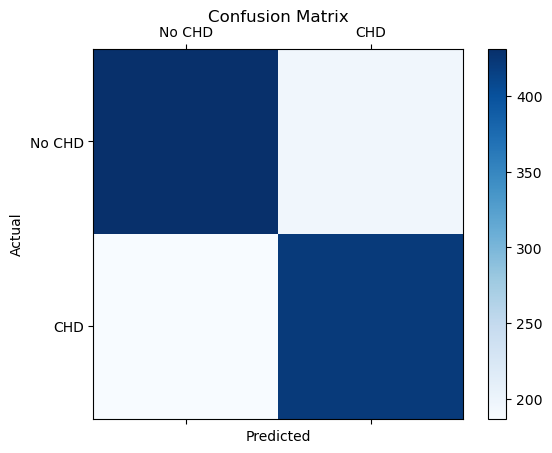

In [38]:
# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix', pad=20)
fig.colorbar(cax)
ax.set_xticklabels([''] + ['No CHD', 'CHD'])
ax.set_yticklabels([''] + ['No CHD', 'CHD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()